In [7]:
#Importing necessary libraries
import pandas as pd 
import numpy as np


In [8]:
# Load the datasets
train_data = pd.read_csv('C:/Users/previ/OneDrive/Documents/TRAIN_TWEET.csv')
test_data = pd.read_csv('C:/Users/previ/OneDrive/Documents/TEST_TWEET.csv')

# View the first few rows of the training data
print(train_data.head())


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [9]:
# Check the size of the datasets
print(f"Training data size: {train_data.shape}")
print(f"Test data size: {test_data.shape}")

Training data size: (31962, 3)
Test data size: (17197, 2)


In [10]:
# Check data types and column names
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [12]:
# Check for null values in the training data
print("Null values in training data:\n", train_data.isnull().sum())

# Check for null values in the test data
print("Null values in test data:\n", test_data.isnull().sum())


Null values in training data:
 id       0
label    0
tweet    0
dtype: int64
Null values in test data:
 id       0
tweet    0
dtype: int64


In [13]:
# Check the distribution of labels in the training set
print("Label distribution in training data:\n", train_data['label'].value_counts())


Label distribution in training data:
 label
0    29720
1     2242
Name: count, dtype: int64


In [7]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


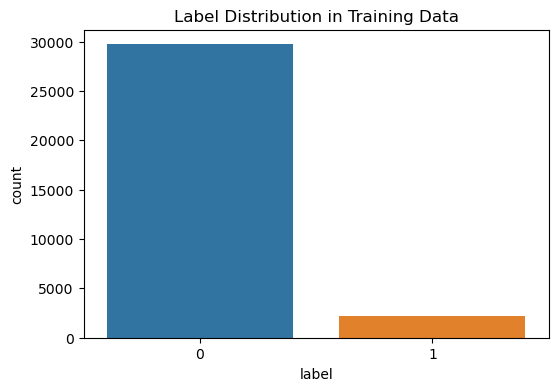

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of labels
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=train_data)
plt.title("Label Distribution in Training Data")
plt.show()


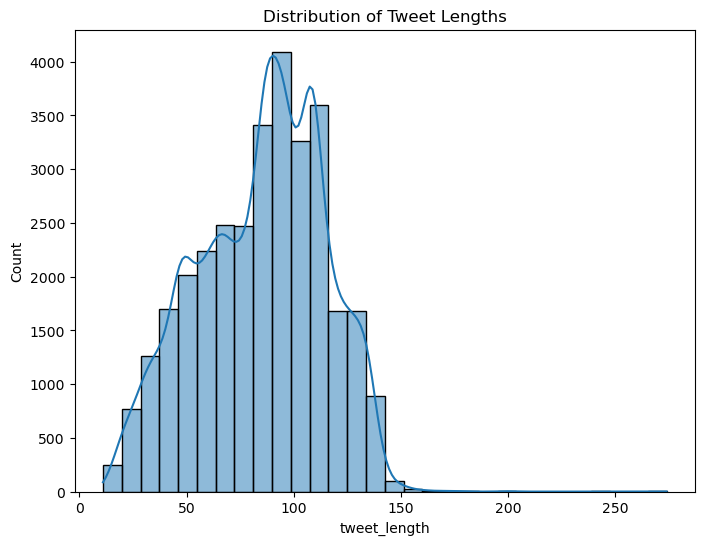

In [15]:
# Add a new column with the length of each tweet
train_data['tweet_length'] = train_data['tweet'].apply(len)

# Visualize the distribution of tweet lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(train_data['tweet_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.show()


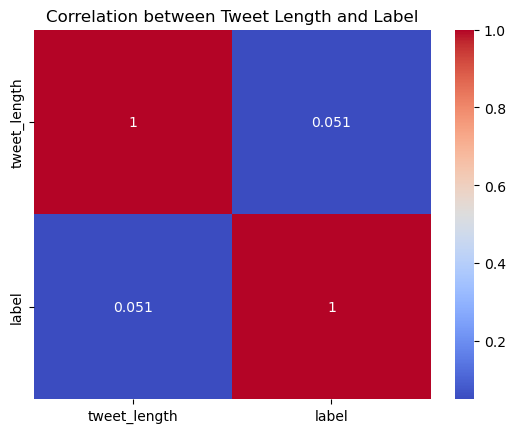

In [17]:
# Compute the correlation matrix for tweet length and label
corr_matrix = train_data[['tweet_length', 'label']].corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Tweet Length and Label')
plt.show()


In [12]:
pip install wordcloud


In [20]:
#cleaning the text data
import re
def clean_text(text):
    # Remove URLs, special characters, and digits
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

# Apply the cleaning function to the 'tweet' column
train_data['cleaned_tweet'] = train_data['tweet'].apply(clean_text)
test_data['cleaned_tweet'] = test_data['tweet'].apply(clean_text)


In [21]:
# View the first few rows of the dataset with cleaned text
print(train_data[['tweet', 'cleaned_tweet']].head())


                                               tweet  \
0   @user when a father is dysfunctional and is s...   
1  @user @user thanks for #lyft credit i can't us...   
2                                bihday your majesty   
3  #model   i love u take with u all the time in ...   
4             factsguide: society now    #motivation   

                                       cleaned_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for lyft credit i cant use cause they...  
2                                bihday your majesty  
3  model   i love u take with u all the time in u...  
4               factsguide society now    motivation  


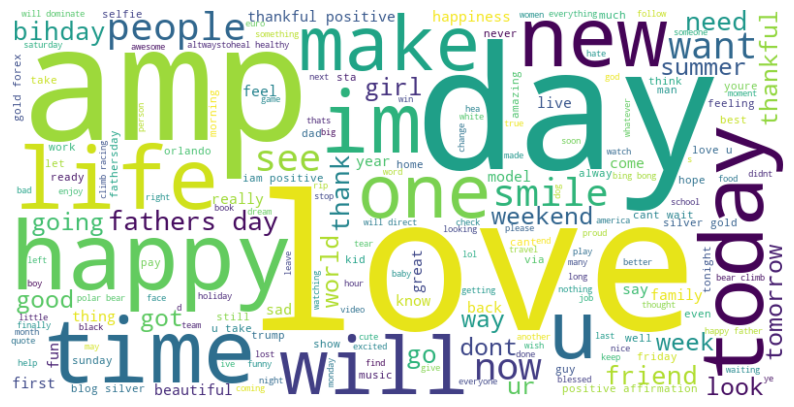

In [22]:
from wordcloud import WordCloud
# Combine all the text from the tweets
all_text = ' '.join([text for text in train_data['cleaned_tweet']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

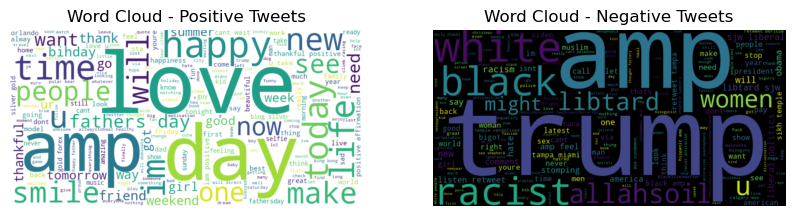

In [23]:

# Separate the positive (non-hate) and negative (hate speech) tweets
positive_tweets = train_data[train_data['label'] == 0]['cleaned_tweet']
negative_tweets = train_data[train_data['label'] == 1]['cleaned_tweet']

# Combine all positive and negative tweets into single strings
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

# Generate word clouds for each
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(10,5))

# Word cloud for positive tweets (non-hate speech)
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Positive Tweets")
plt.axis('off')

# Word cloud for negative tweets (hate speech)
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Negative Tweets")
plt.axis('off')

plt.show()


In [20]:
pip install pandas numpy scikit-learn transformers torch


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\previ\anaconda3\lib\site-packages (2.0.3)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5a/6a/775b93d6888c31f1f1fc457e4f5cc89f0984412d5dcdef792b8f2aa6e812/torch-2.4.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/199.4 MB 3.2 MB/s eta 0:01:03
   ---------------------------------------- 0.2/199.4 MB 2.6 MB/s eta 0:01:17
   ---------------------------------------- 0.3/199.4 MB 2.3 MB/s eta 0:01:29
   ---------------------------------------- 0.4/199.4 MB 2.4 MB/s eta 0:01:22
   --------------------------

   ------------------------------- -------- 156.2/199.4 MB 1.9 MB/s eta 0:00:23
   ------------------------------- -------- 156.3/199.4 MB 2.0 MB/s eta 0:00:23
   ------------------------------- -------- 156.4/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 156.5/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 156.6/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 156.7/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 156.7/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 156.7/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 156.8/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 156.9/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 157.0/199.4 MB 2.0 MB/s eta 0:00:22
   ------------------------------- -------- 157.1/199.4 MB 1.9 MB/s eta 0:00:22
   ------------------------------- -----

In [24]:
from sklearn.model_selection import train_test_split

# where 'label' is the target column
X = train_data['cleaned_tweet']  # Features (tweets)
y = train_data['label']  # Labels (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [25]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute class weights based on the labels in the training data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert the class weights to a tensor for PyTorch use
class_weights = torch.tensor(class_weights, dtype=torch.float)

print("Class Weights:", class_weights)


Class Weights: tensor([0.5375, 7.1582])


In [26]:
from transformers import BertForSequenceClassification
from torch.nn import CrossEntropyLoss
from transformers import Trainer, TrainingArguments

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define the loss function with class weights
loss_function = CrossEntropyLoss(weight=class_weights)

# When training using a custom loop, you'll incorporate the weighted loss like this


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
from transformers import Trainer

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # Use the custom loss function with class weights
        loss = loss_function(logits, labels)
        return (loss, outputs) if return_outputs else loss


In [19]:
pip install transformers[torch]


  Obtaining dependency information for accelerate>=0.20.3 from https://files.pythonhosted.org/packages/2c/92/48aec3736ca778ffe5fa68e19e3c18917cba4de43fa46fe6176cccafe267/accelerate-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0,>=0.15.1 from https://files.pythonhosted.org/packages/64/09/a535946bf2dc88e61341f39dc507530411bb3ea4eac493e5ec833e8f35bd/huggingface_hub-0.25.2-py3-none-any.whl.metadata
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/6d/41/948c96c8a7e9fef57c2e051f1871c108a6dbbc6d285598bdb1d89b98617c/safetensors-0.4.5-cp311-none-win_amd64.whl.metadata
  Obtaining dependency information for fsspec>=2023.5.0 from https://files.pythonhosted.org/packages/1d/a0/6aaea0c2fbea2f89bfd5db25fb1e3481896a423002ebe4e55288907a97a3/fsspec-2024.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/330.9 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/330.9 k

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2024.9.0 which is incompatible.


In [28]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the training and test sets
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)


In [29]:
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create training and validation datasets
train_dataset = TweetDataset(train_encodings, y_train.tolist())
val_dataset = TweetDataset(val_encodings, y_test.tolist())


In [30]:
training_args = TrainingArguments(
    output_dir='./results',              # Output directory for model checkpoints
    num_train_epochs=3,                  # Number of epochs to train for
    per_device_train_batch_size=16,      # Training batch size
    per_device_eval_batch_size=16,       # Evaluation batch size
    logging_dir='./logs',                # Directory for logs
    logging_steps=10,                    # Log every 10 steps
    evaluation_strategy="epoch"          # Evaluate at the end of each epoch
)


C:\Users\previ\anaconda3\Lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [31]:
# Define the custom trainer with class weights in the loss function
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,        # The training dataset
    eval_dataset=val_dataset            # The validation dataset
)

# Train the model
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.709200,0.545548
2,0.451500,0.376219
3,0.428100,0.609930


TrainOutput(global_step=4797, training_loss=0.3289928311180756, metrics={'train_runtime': 21550.8326, 'train_samples_per_second': 3.559, 'train_steps_per_second': 0.223, 'total_flos': 1655592399193320.0, 'train_loss': 0.3289928311180756, 'epoch': 3.0})

In [33]:
# Evaluate the model on the validation dataset (held-out test set)
trainer.evaluate(val_dataset)


{'eval_loss': 0.6099299788475037,
 'eval_runtime': 682.0577,
 'eval_samples_per_second': 9.373,
 'eval_steps_per_second': 0.586,
 'epoch': 3.0}

In [32]:
# Save the trained model
model.save_pretrained('./saved_model')


In [34]:
from sklearn.metrics import classification_report

# Get predictions from the model on the validation dataset
predictions = trainer.predict(val_dataset)
preds = predictions.predictions.argmax(-1)

# Print classification report
print(classification_report(y_test, preds, target_names=['Non-hate', 'Hate']))


              precision    recall  f1-score   support

    Non-hate       0.98      0.99      0.98      5937
        Hate       0.79      0.71      0.75       456

    accuracy                           0.97      6393
   macro avg       0.89      0.85      0.87      6393
weighted avg       0.97      0.97      0.97      6393



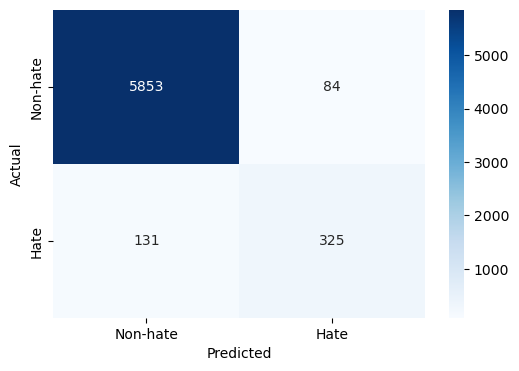

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-hate', 'Hate'], yticklabels=['Non-hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [38]:
#TESTING ON THE TEST DATA WHICH HAS NO LABEL
print(test_data.shape)  # Should show (17197, number_of_columns)
print(test_data.columns)  # Check if 'cleaned_tweet' is a column


(17197, 3)
Index(['id', 'tweet', 'cleaned_tweet'], dtype='object')


In [39]:
# Tokenize the test_data (which contains 17197 rows)
test_encodings = tokenizer(list(test_data['cleaned_tweet']), truncation=True, padding=True, max_length=128)


In [40]:
test_dataset = TweetDataset(test_encodings, labels=[0]*len(test_data))  # Placeholder labels


In [41]:
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)


In [42]:
# Create the DataFrame to store predictions
predictions_df = pd.DataFrame({
    'tweet': test_data['cleaned_tweet'],  # Original tweet
    'predicted_label': preds              # Predicted label (0 for Non-hate, 1 for Hate)
})

# Save the predictions to a CSV file
predictions_df.to_csv('test_predictions.csv', index=False)

# Display a few rows to confirm
print(predictions_df.head())


                                               tweet  predicted_label
0  studiolife aislife requires passion dedication...                0
1    white supremacists want everyone to see the ...                1
2  safe ways to heal your acne    altwaystoheal h...                0
3  is the hp and the cursed child book up for res...                0
4    rd bihday to my amazing hilarious nephew eli...                0


In [21]:
!pip install transformers --upgrade
!pip install accelerate --upgrade


  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/f9/9d/030cc1b3e88172967e22ee1d012e0d5e0384eb70d2a098d1669d549aea29/transformers-4.45.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.4 kB ? eta -:--:--
     -------------------------------------- 44.4/44.4 kB 541.8 kB/s eta 0:00:00
  Obtaining dependency information for tokenizers<0.21,>=0.20 from https://files.pythonhosted.org/packages/f1/95/f1b56f4b1fbd54bd7f170aa64258d0650500e9f45de217ffe4d4663809b6/tokenizers-0.20.1-cp311-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 2.6 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.9 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.9 MB 2.5 MB/s eta 0:00:04
   -- ------------------------------------